In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

from scipy.stats import norm

## 两种描述连续随机变量的概率分布的函数：
概率密度函数PDF（Probability Density Function）：描述某个确定的取值点附近的**可能性**的函数
累积分布函数CDF (Cumulative Distribution Functions): 是PDF的（从负无穷-oo到当前值的）积分

概率密度函数是概率分布函数的导函数。
通过对PDF求积分，就可以得到CDF，实际上就是求概率密度函数曲线，从负无穷-oo到当前值对应的取样点的线下面积。
那么通过计算某个取样点的左右两个非常临近的点的CDF的差，就能“计算”在该取样点的实际概率。

In [2]:
X_step = 0.0002
def norm_prob(x, mu, sigma):
    p = norm(mu,sigma).cdf(x+X_step/2) - norm(mu,sigma).cdf(x-X_step/2)
    return p

def loglikelihood(data, mu, sigma):
    l = 0.0
    for x in data:
        l -= np.log(norm_prob(x, mu, sigma))
    return l

生成随机数列

In [3]:
N=1000
mu, sigma = 1.6, 0.2

data = norm.rvs(loc=mu, scale=sigma, size = N)

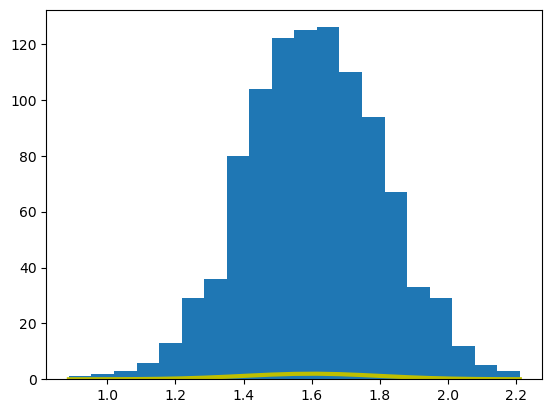

In [4]:
# Create the bins and histogram
count, bins, ignored = plt.hist(data, 20)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')
plt.show()



In [5]:
def hist_dist(pd):
    f, ax_hist = plt.subplots(1, sharex=True)
    _, FD_bins = np.histogram(pd, bins="fd")
    bin_nr = min(len(FD_bins)-1, 50)
    sns.histplot(data=pd, ax=ax_hist, bins=bin_nr, stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})

/home/xeniro/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


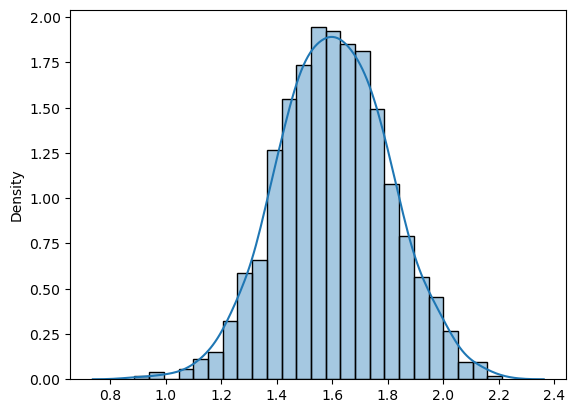

In [6]:
hist_dist(data)

In [7]:
min_v, max_v = min(data), max(data)
step = (max_v - min_v)/N

In [8]:
# pdf用于计算概率密度，这个值可能是大于1的。
h=1.8 # 某个具体样本值
norm.pdf(x=h, loc=mu, scale=sigma)

1.209853622595717

In [9]:
AUC = 0
for n in range (N):
    x = min_v + step*n
    y = norm_prob(x, mu, sigma)
    print(f"x= {x}, y = {y}")
    AUC += y

print(AUC)


x= 0.8869060136029346, y = 6.924836272608783e-07
x= 0.8882305079985067, y = 7.090137281342938e-07
x= 0.8895550023940788, y = 7.259065779710637e-07
x= 0.8908794967896508, y = 7.431693202082613e-07
x= 0.892203991185223, y = 7.60809219076228e-07
x= 0.893528485580795, y = 7.788336611807222e-07
x= 0.8948529799763671, y = 7.972501570980791e-07
x= 0.8961774743719392, y = 8.160663429798568e-07
x= 0.8975019687675112, y = 8.352899821633102e-07
x= 0.8988264631630833, y = 8.54928966798345e-07
x= 0.9001509575586554, y = 8.7499131947935e-07
x= 0.9014754519542275, y = 8.954851948899322e-07
x= 0.9027999463497995, y = 9.164188814543735e-07
x= 0.9041244407453716, y = 9.378008029985738e-07
x= 0.9054489351409437, y = 9.596395204219997e-07
x= 0.9067734295365157, y = 9.819437333730206e-07
x= 0.9080979239320879, y = 1.0047222819422425e-06
x= 0.9094224183276599, y = 1.0279841483530508e-06
x= 0.9107469127232319, y = 1.0517384586636986e-06
x= 0.9120714071188041, y = 1.0759944844825151e-06
x= 0.9133959015143761,

In [10]:
norm_prob(h, mu, sigma)

0.00024197072451903612

In [11]:
loglikelihood(data, mu, sigma)

8321.746440547535

(array([  3.,   9.,  42., 116., 226., 251., 204., 100.,  41.,   8.]),
 array([0.88690601, 1.01935545, 1.15180489, 1.28425433, 1.41670377,
        1.54915321, 1.68160265, 1.81405209, 1.94650153, 2.07895097,
        2.21140041]),
 <BarContainer object of 10 artists>)

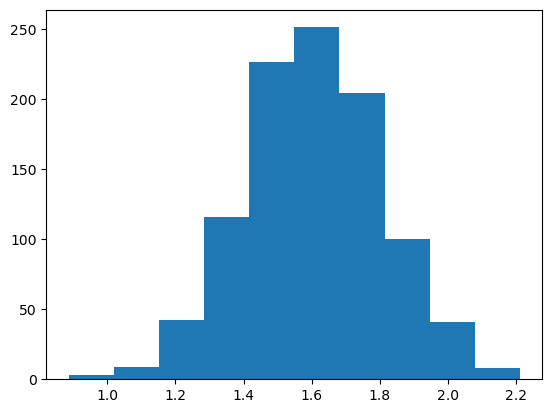

In [12]:
plt.hist(data)

In [13]:
mus = [1.4,1.5,1.6,1.7,1.8,1.9,2.0]
sigma =0.1
mus

[1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

In [14]:
l = [loglikelihood(data,mu2,sigma) for mu2 in mus]
l

/tmp/ipykernel_133245/153076123.py:9: RuntimeWarning: divide by zero encountered in log
  l -= np.log(norm_prob(x, mu, sigma))


[inf,
 9665.475844942264,
 9113.75664672844,
 9562.03180706782,
 11010.306630845265,
 13458.581121260111,
 16906.855278342402]

In [15]:
import pandas as pd
df = pd.DataFrame()
df['mu'] = mus
df['-logl'] =l
df                                     

,mu,-logl
0,1.4,inf
1,1.5,9.665476e+03
2,1.6,9.113757e+03
3,1.7,9.562032e+03
4,1.8,1.101031e+04
5,1.9,1.345858e+04
6,2.0,1.690686e+04


<Axes: xlabel='mu', ylabel='-logl'>

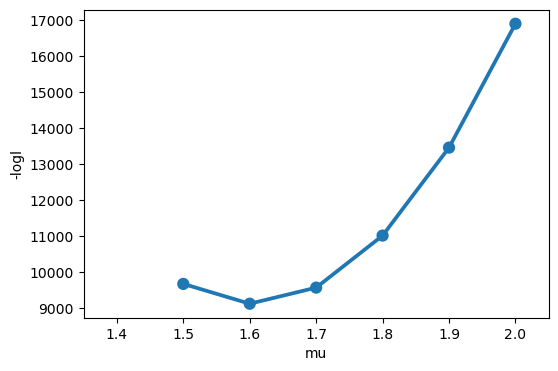

In [21]:
plt.figure(figsize=(6,4))

sns.pointplot(x="mu", y="-logl", data=df)